In [15]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from adjustText import adjust_text
import scipy.stats as stats

# 1. Se cargan el conjunto de datos

In [24]:
# Define la ruta base del proyecto (la raíz del proyecto)
# Esto asume que el notebook está en la carpeta notebooks

BASE_PATH = os.path.abspath('..')  # Esto asume que el notebook está en la carpeta notebooks

RAW_DATA_PATH = os.path.join(BASE_PATH, 'data', 'raw')
PROCESSED_DATA_PATH = os.path.join(BASE_PATH, 'data', 'processed')

FILE_NAME = 'bank-additional-full.csv'
FILE_NAME_PROCESSED = 'bank-additional-full-Processed.csv'

# Carga un archivo CSV de la carpeta raw (como ejemplo)
CSV_FILE = os.path.join(RAW_DATA_PATH, FILE_NAME)

data = pd.read_csv(CSV_FILE, sep=';')

# Muestra las primeras filas para confirmar que los datos se cargaron correctamente
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

# 2. Se genera reporte general del conjunto de datos

In [4]:
profile = ProfileReport(data, title="Pandas Profiling Report")

In [5]:
# profile.to_file("output/data_profile.html")

# 3. Descripción de las columnas

Los datos están relacionados con [campañas de marketing directo](https://archive.ics.uci.edu/dataset/222/bank+marketing) (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo de clasificación es predecir si el cliente suscribirá un depósito a plazo (variable y).

A continuación se presentan la descripción de las columnas que conforma el conjunto de datos

| Variable Name | Role    | Type        | Demographic      | Description                                                                                                                    | Units | Missing Values |
|---------------|---------|-------------|------------------|--------------------------------------------------------------------------------------------------------------------------------|-------|----------------|
| age           | Feature | Integer     | Age              |                                                                                                                                |       | no             |
| job           | Feature | Categorical | Occupation       | type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown') |       | no             |
| marital       | Feature | Categorical | Marital Status   | marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)          |       | no             |
| education     | Feature | Categorical | Education Level  | (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown') |       | no             |
| default       | Feature | Binary      |                  | has credit in default?                                                                                                         |       | no             |
| balance       | Feature | Integer     |                  | average yearly balance                                                                                                         | euros | no             |
| housing       | Feature | Binary      |                  | has housing loan?                                                                                                              |       | no             |
| loan          | Feature | Binary      |                  | has personal loan?                                                                                                             |       | no             |
| contact       | Feature | Categorical |                  | contact communication type (categorical: 'cellular', 'telephone')                                                              |       | yes            |
| day_of_week   | Feature | Date        |                  | last contact day of the week                                                                                                   |       | no             |
| month         | Feature | Date        |                  | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                               |       | no             |
| duration      | Feature | Integer     |                  | last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. |       | no             |
| campaign      | Feature | Integer     |                  | number of contacts performed during this campaign and for this client (numeric, includes last contact)                         |       | no             |
| pdays         | Feature | Integer     |                  | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted) |       | yes            |
| previous      | Feature | Integer     |                  | number of contacts performed before this campaign and for this client                                                          |       | no             |
| poutcome      | Feature | Categorical |                  | outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')                                 |       | yes            |
| y             | Target  | Binary      |                  | has the client subscribed a term deposit?                                                                                      |       |                |


In [25]:
data.shape

(41188, 21)

In [6]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

# 4. Análisis variables categóricas

In [7]:
data_categorical = data.select_dtypes(include=['category', 'object'])

In [8]:
data_categorical.describe()

job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548

In [9]:
categorical_columns = list(data_categorical.columns)

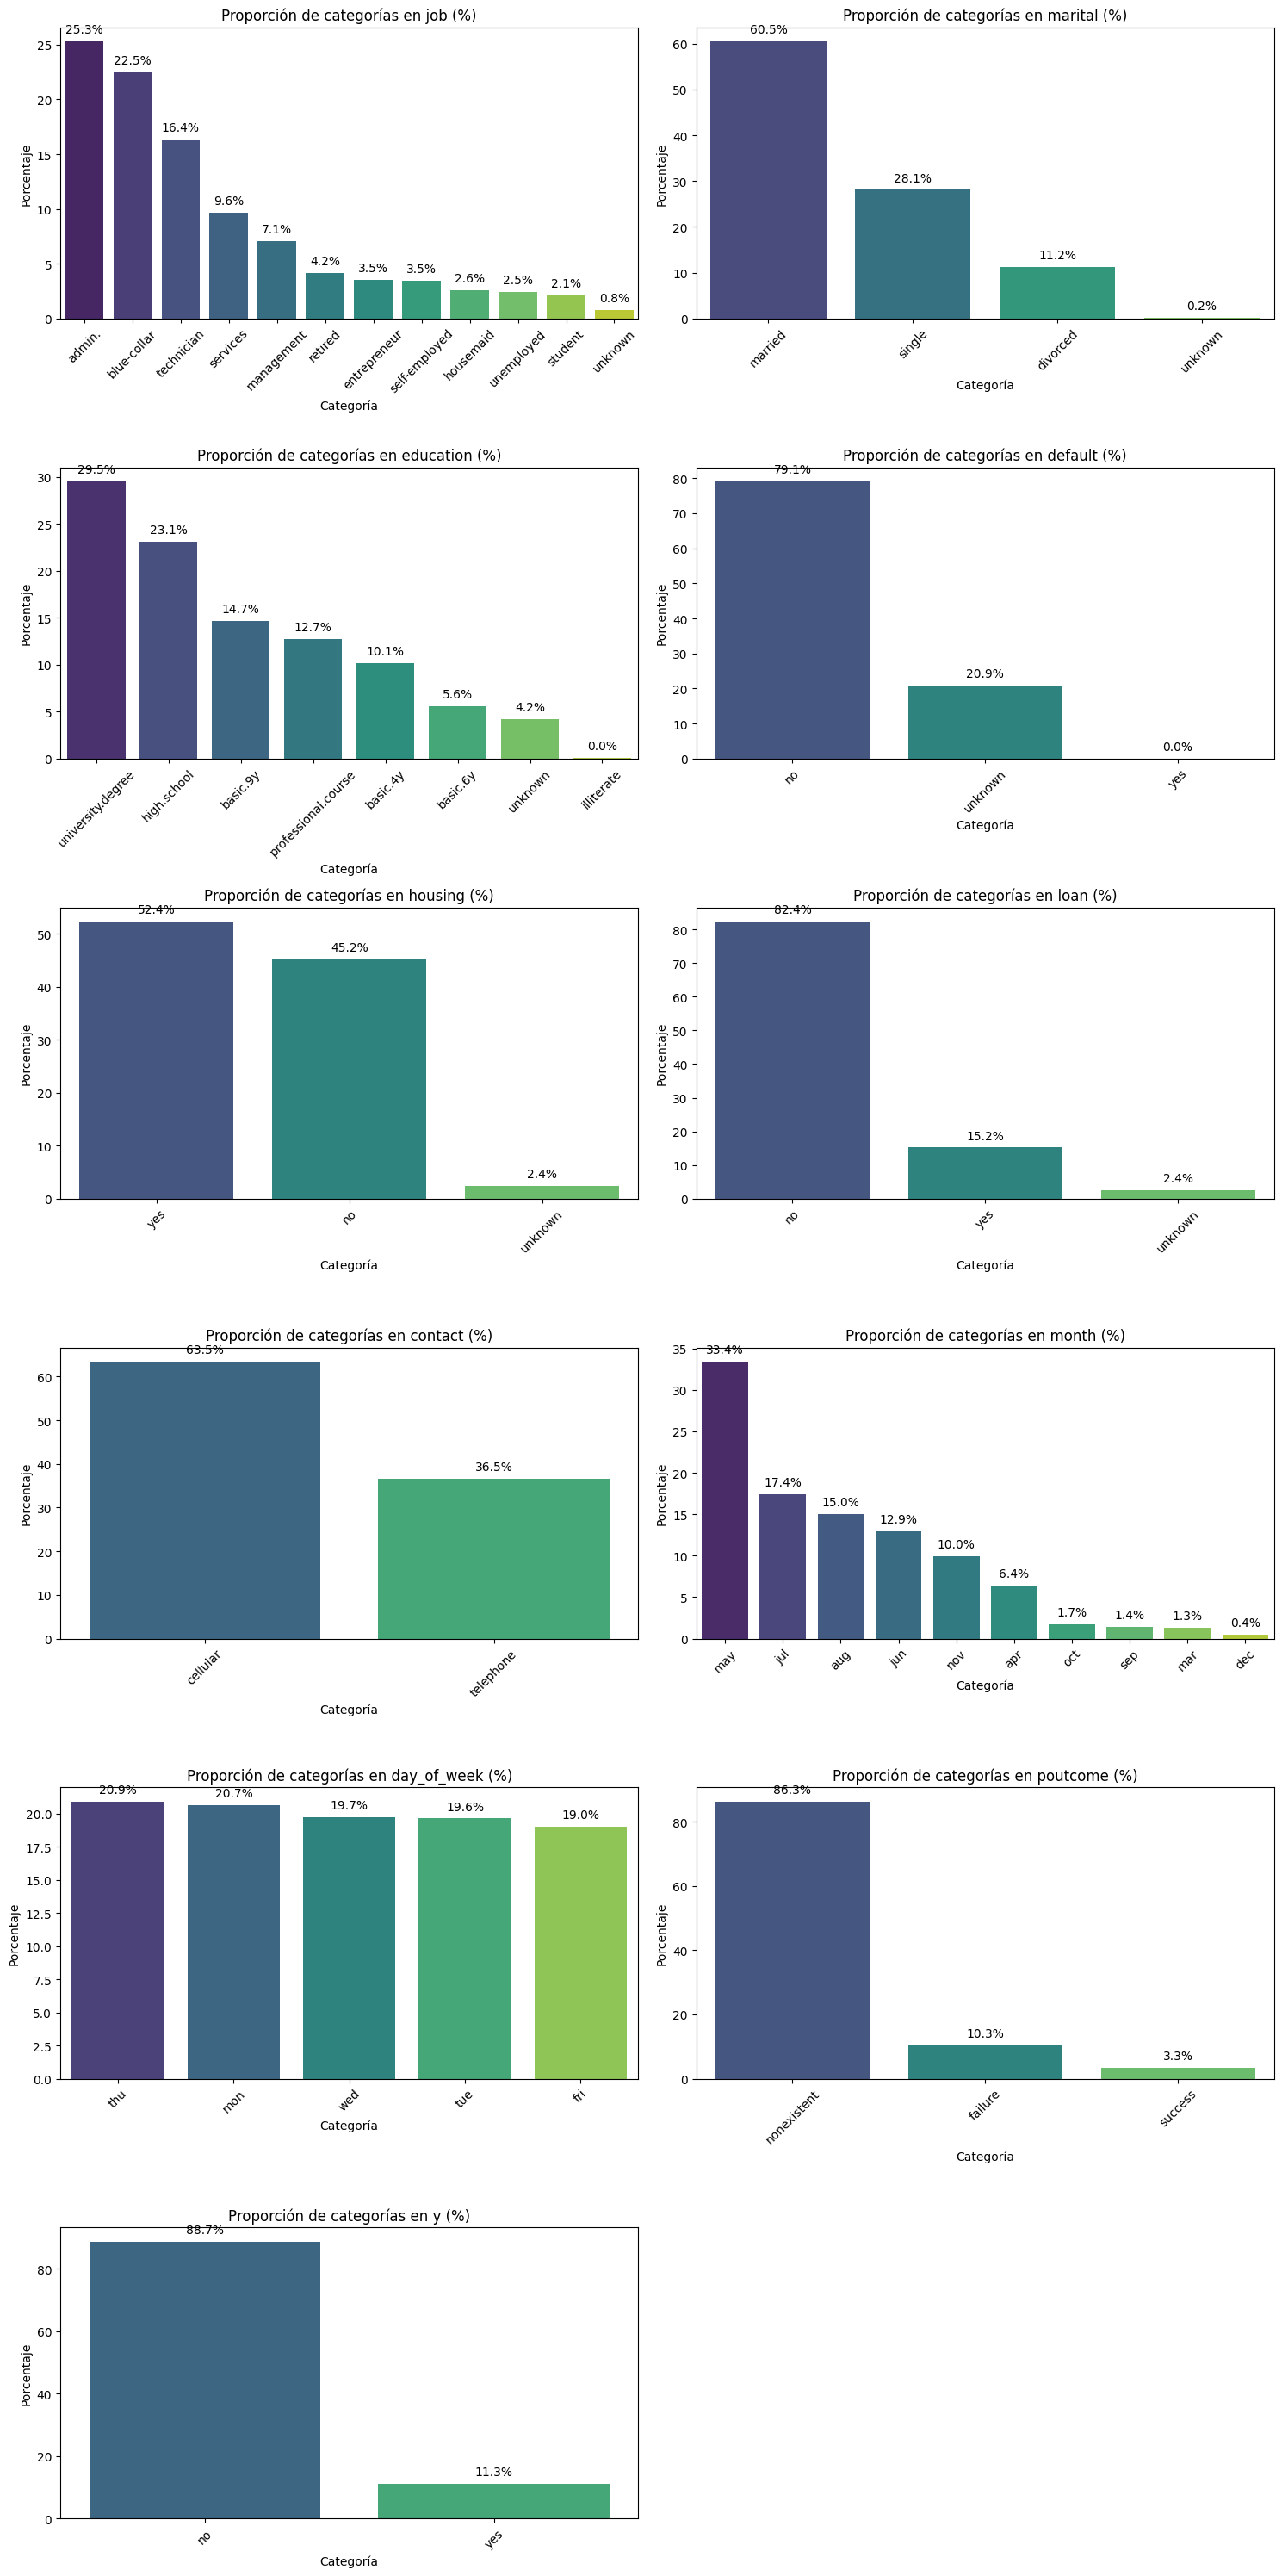

In [10]:
# Configuración del tamaño de los gráficos
plt.figure(figsize=(15, len(categorical_columns) * 5))

# Iterar sobre cada columna categórica para crear gráficos de barras
for i, col in enumerate(categorical_columns, 1):
    # Calcular la proporción de cada categoría en porcentaje
    proportions = data_categorical[col].value_counts(normalize=True) * 100
    
    # Subplot para cada gráfico
    plt.subplot(len(categorical_columns), 2, i)
    
    # Gráfico de barras
    ax = sns.barplot(x=proportions.index, y=proportions.values, hue=proportions.index, palette="viridis", dodge=False, legend=False)
    plt.title(f'Proporción de categorías en {col} (%)')
    plt.ylabel('Porcentaje')
    plt.xlabel('Categoría')
    plt.xticks(rotation=45)

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')    
    
# Ajuste de los espacios entre gráficos
plt.tight_layout()
plt.show()

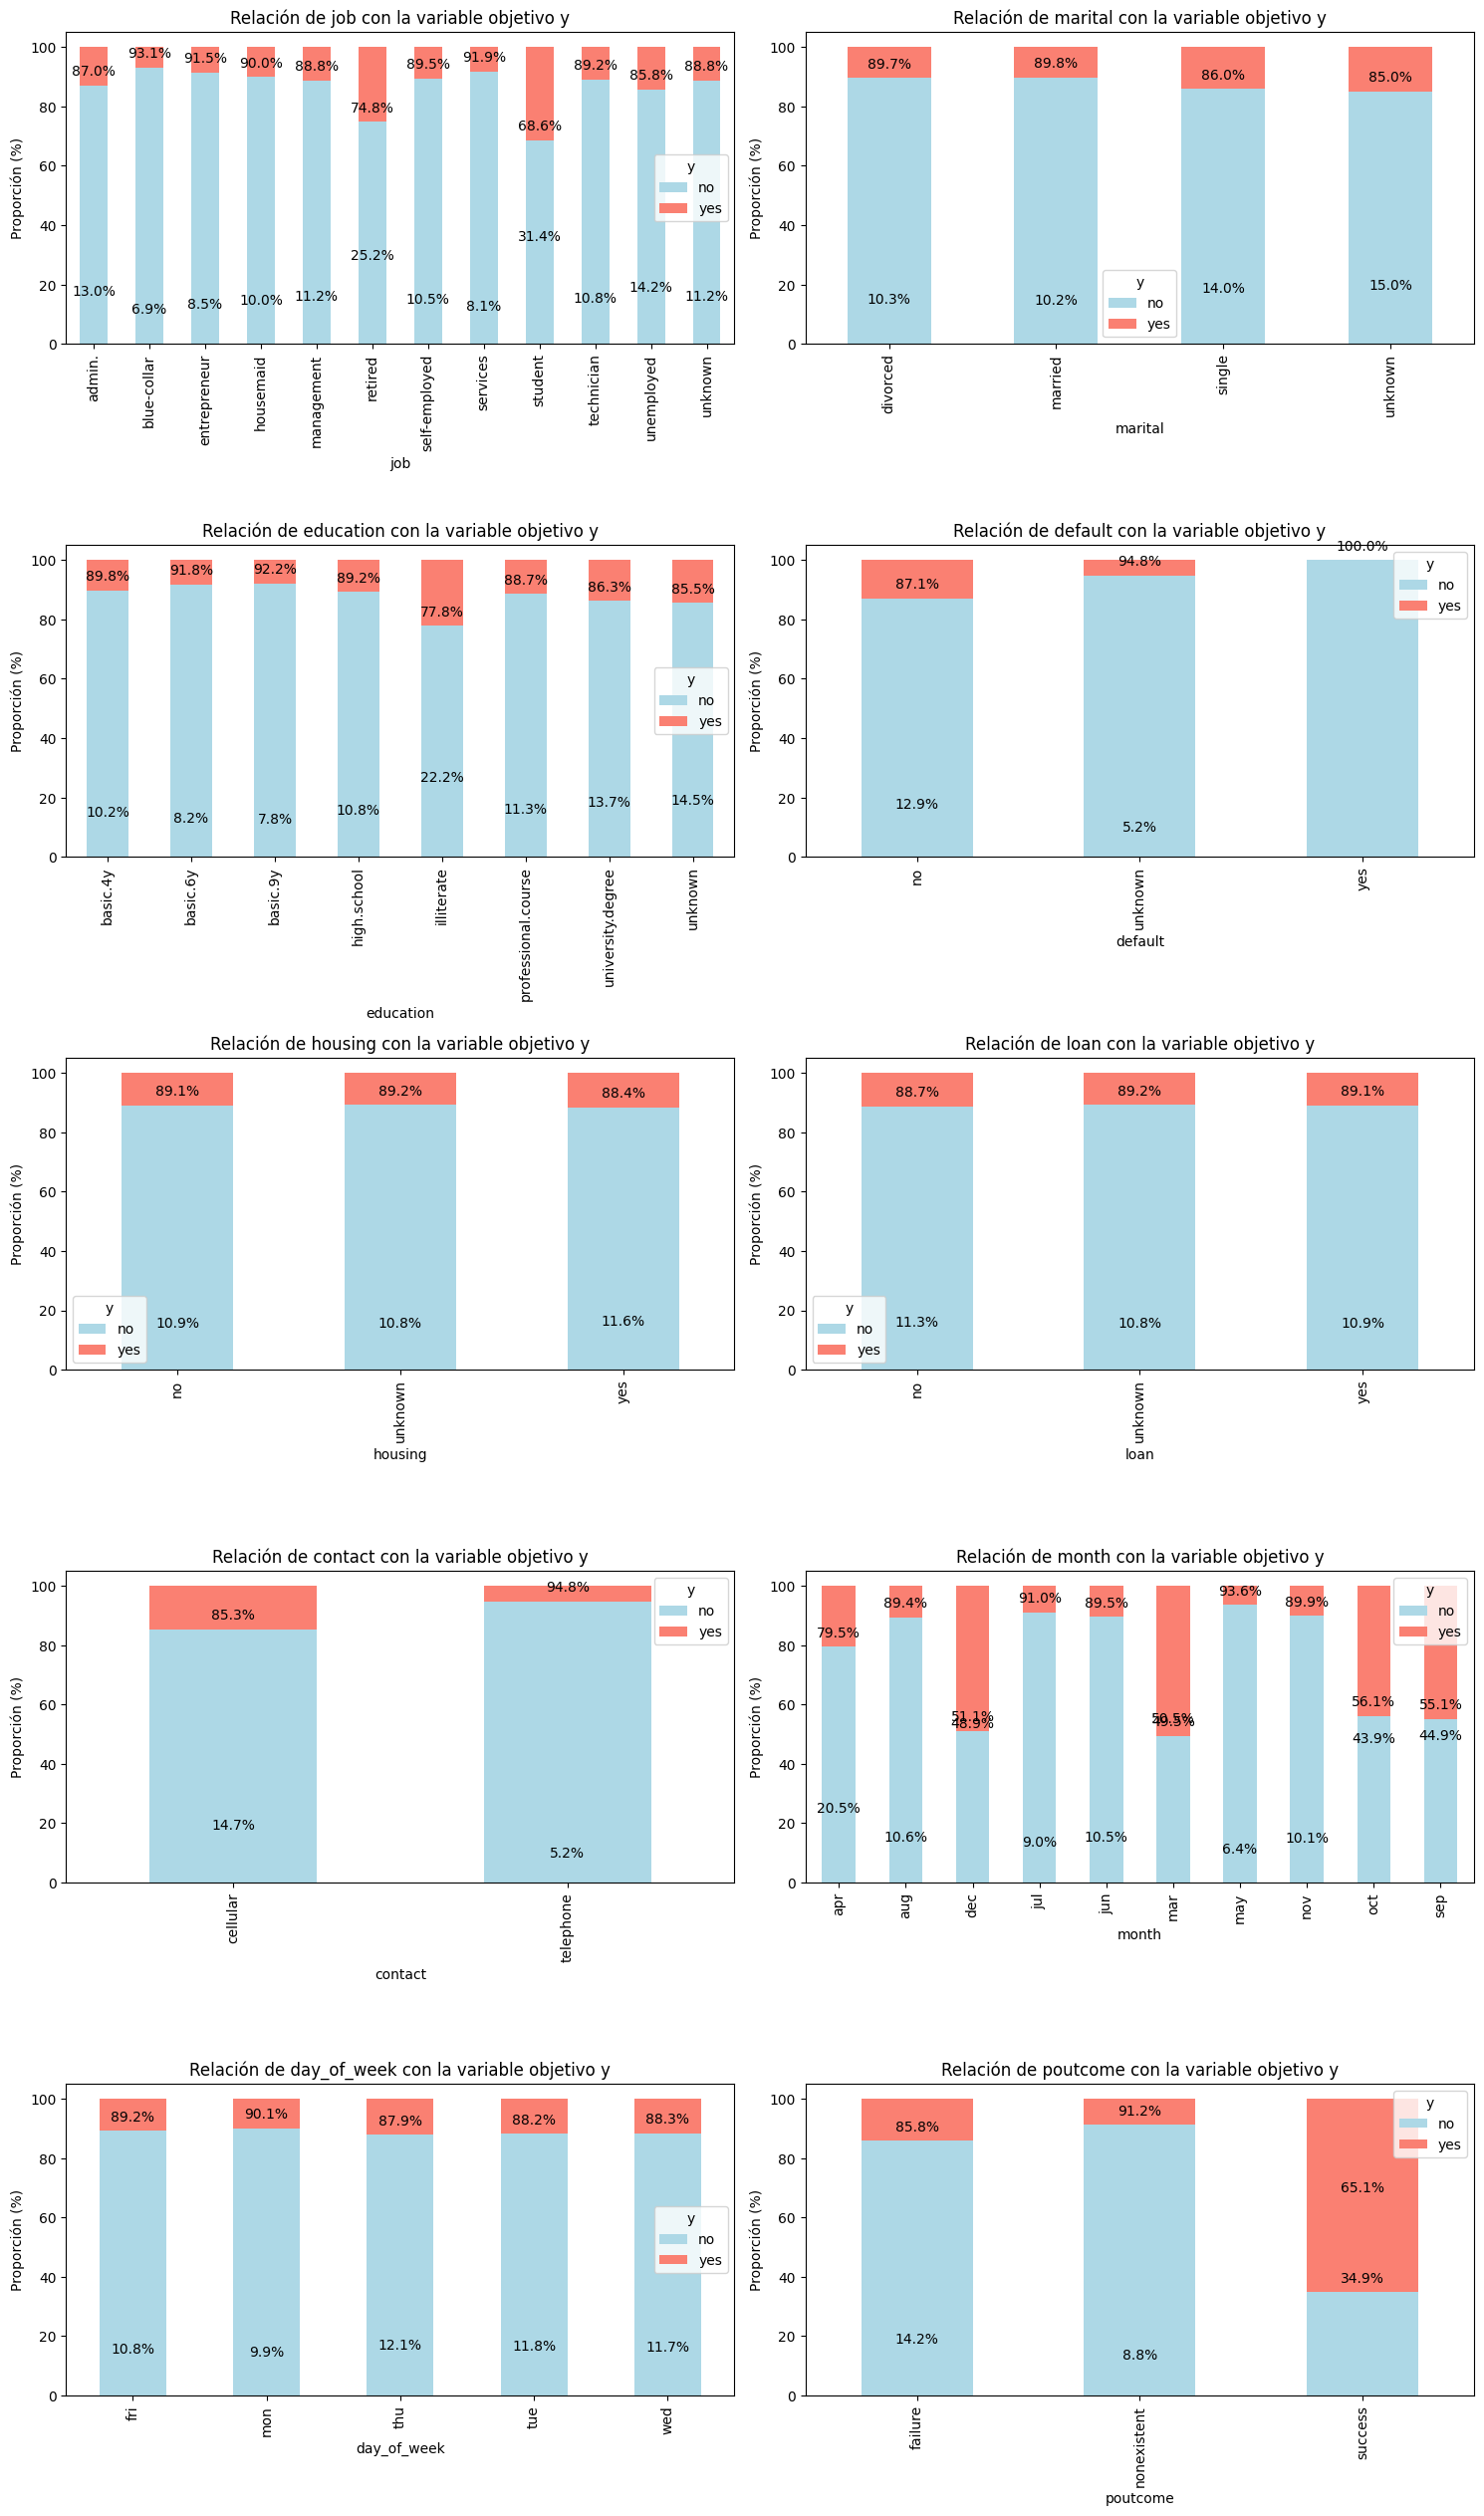

In [11]:
# Configuración del tamaño de la figura
plt.figure(figsize=(15, len(categorical_columns[:-1]) * 5))

# Iterar sobre cada variable categórica y crear un gráfico de barras
for i, col in enumerate(categorical_columns[:-1], 1):
    plt.subplot(len(categorical_columns[:-1]), 2, i)

    # Calcular la cantidad de ocurrencias de cada categoría en función de 'y'
    counts = data.groupby([col, 'y']).size().unstack(fill_value=0)
    
    # Calcular las proporciones de 'y' para cada categoría
    proportions = counts.div(counts.sum(axis=1), axis=0) * 100
    
    # Crear gráfico de barras
    proportions.plot(kind='bar', stacked=True, ax=plt.gca(), color=['lightblue', 'salmon'])
    
    # Añadir porcentajes encima de las barras
    for p in plt.gca().patches:
        height = p.get_height()
        if height > 0:  # Solo mostrar porcentajes para alturas positivas
            percentage = f'{height:.1f}%'  # Mostrar el porcentaje
            plt.gca().annotate(percentage, (p.get_x() + p.get_width() / 2., height), 
                               ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

    plt.title(f'Relación de {col} con la variable objetivo y')
    plt.xlabel(col)
    plt.ylabel('Proporción (%)')
    plt.legend(title='y', labels=counts.columns)

# Ajustar el espaciado entre gráficos
plt.tight_layout()
plt.show()

# 5. Análisis variables numéricas

In [12]:
data_numerical = data.select_dtypes(include=['int64', 'float64'])
numerical_columns = list(data_numerical.columns)

In [13]:
data_numerical.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [14]:
data_numerical.isnull().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [15]:
data_numerical.isna().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

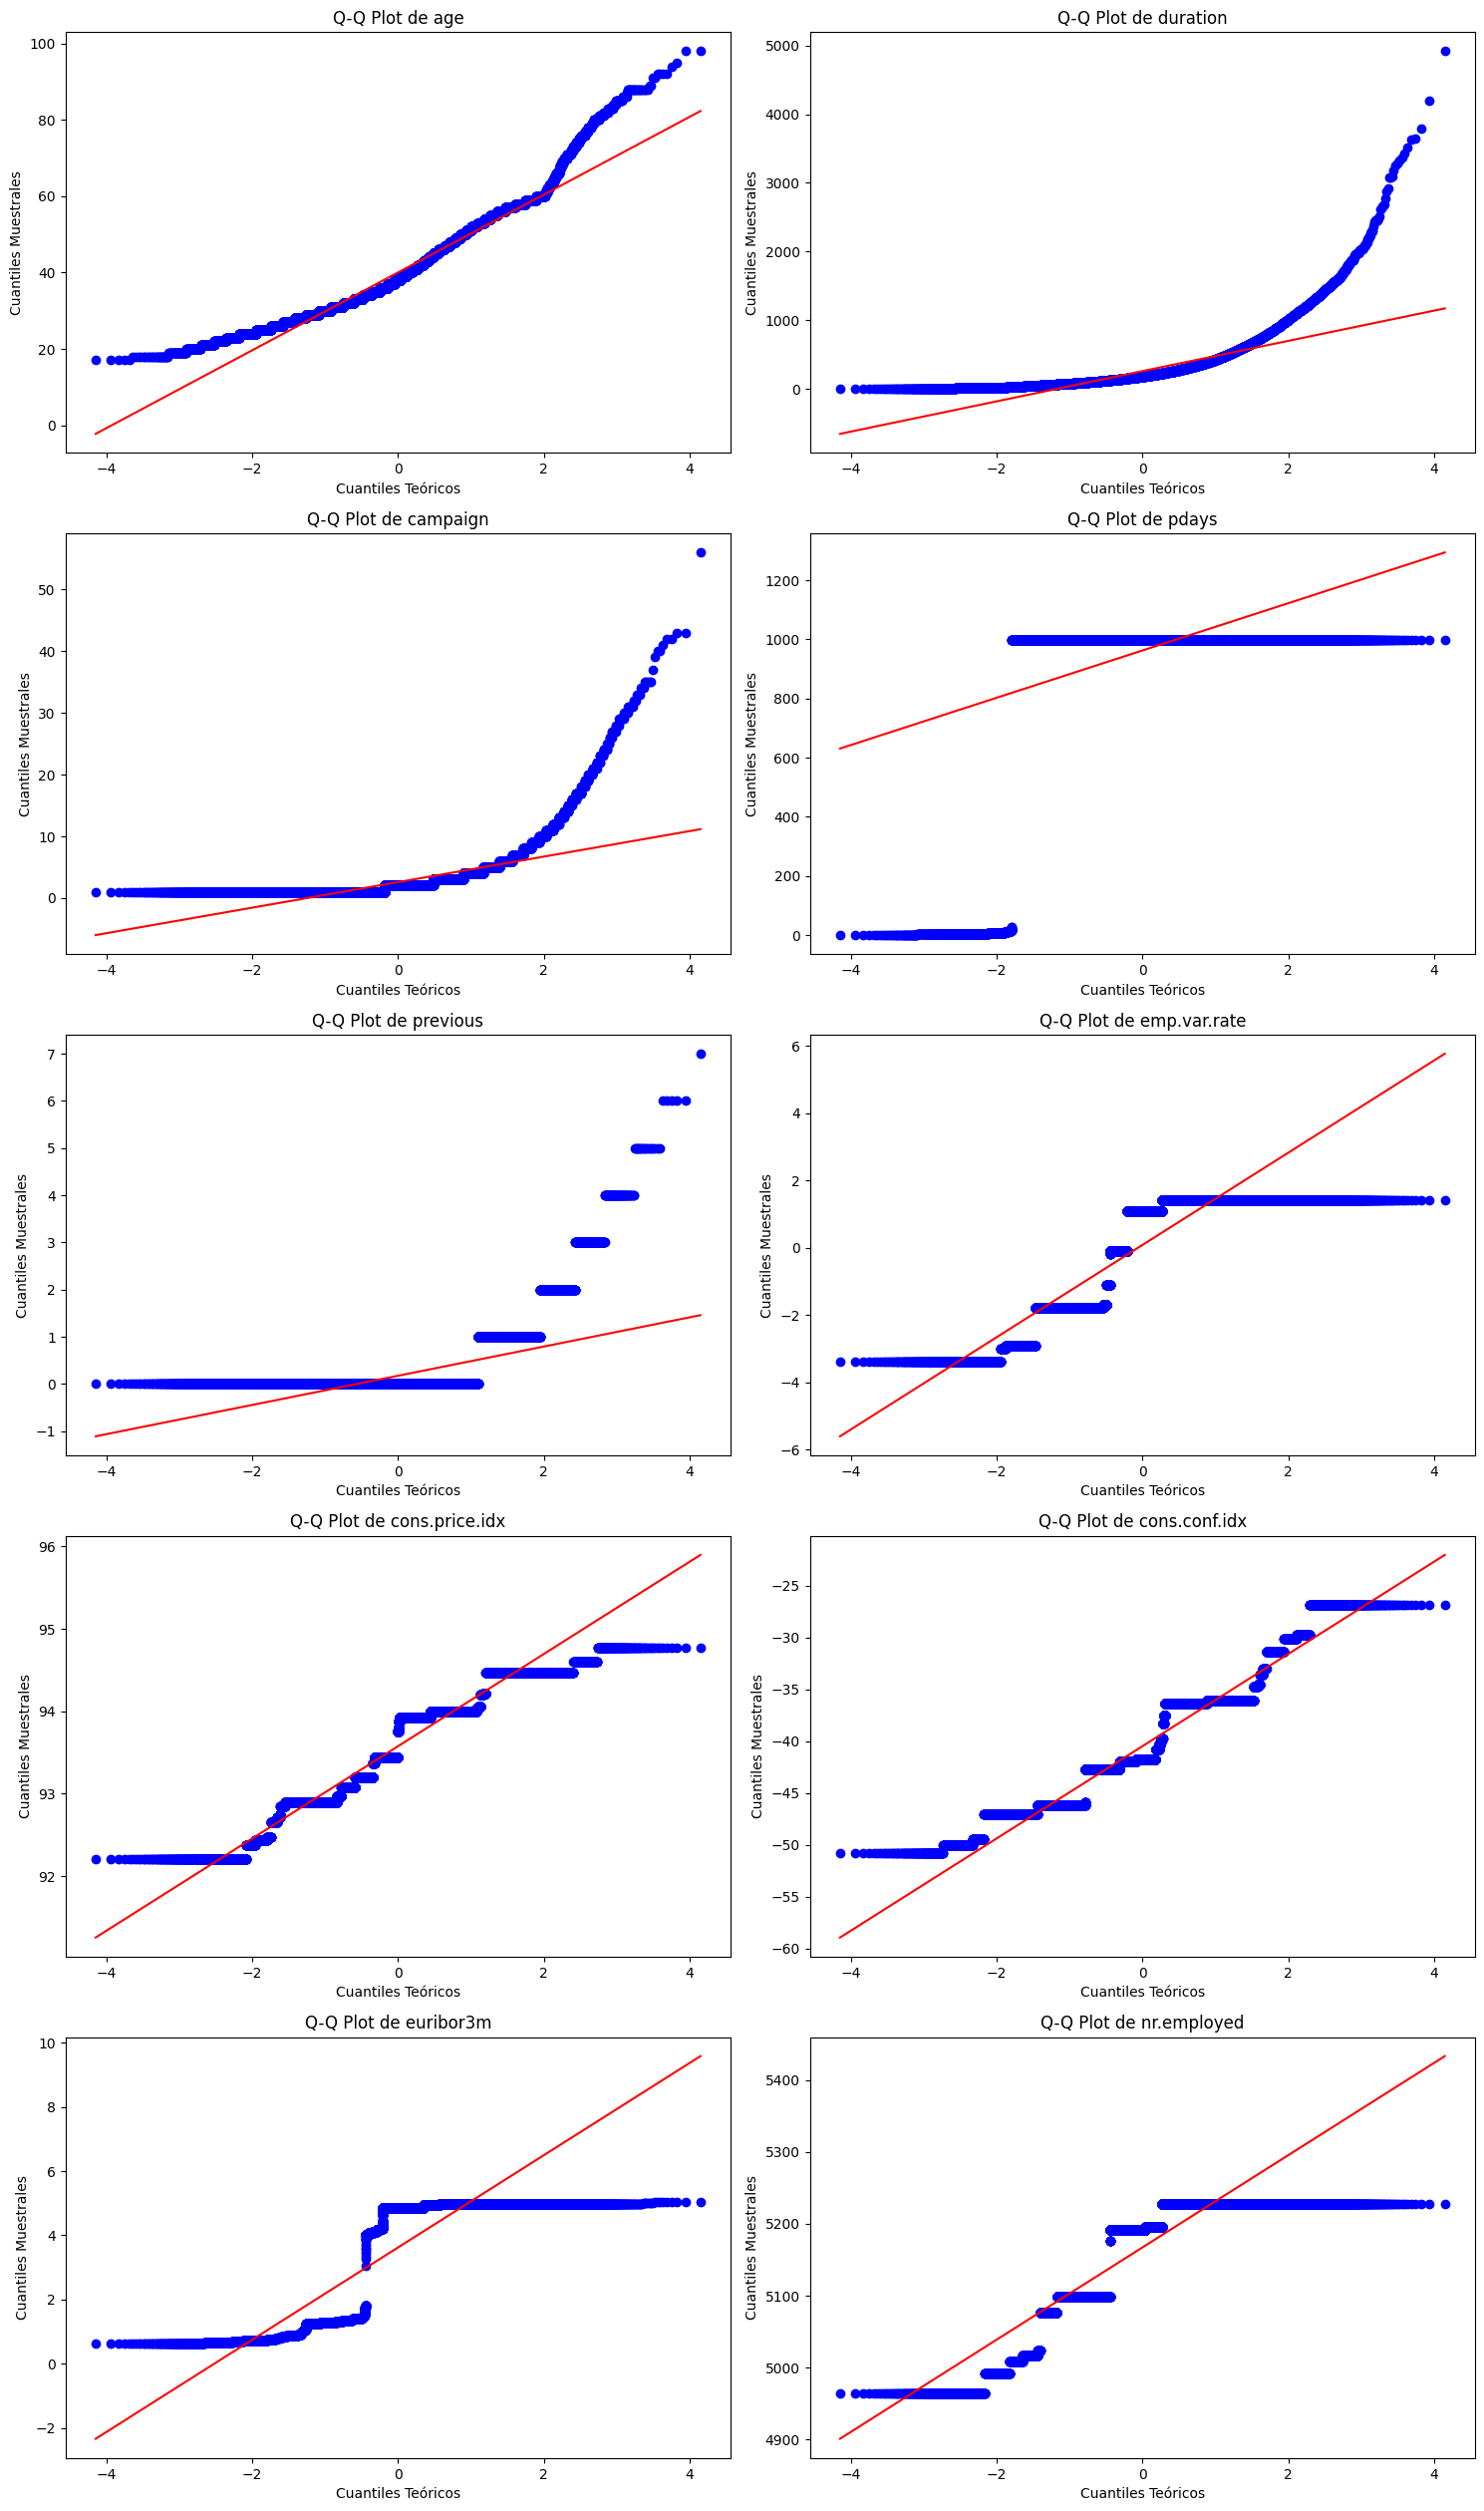

In [19]:
# Filtrar solo las columnas numéricas
numerical_columns = data_numerical.select_dtypes(include=['int', 'float']).columns

# Configuración del tamaño de la figura
plt.figure(figsize=(15, len(numerical_columns) * 5))

# Generar un gráfico Q-Q para cada columna numérica
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, i)
    stats.probplot(data_numerical[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot de {col}')
    plt.xlabel('Cuantiles Teóricos')
    plt.ylabel('Cuantiles Muestrales')

# Ajustar el espaciado entre gráficos
plt.tight_layout()
plt.show()

In [20]:
# Lista para almacenar los resultados
normality_results = []

# Aplicar el test de Shapiro-Wilk para cada variable numérica
for col in numerical_columns:
    # Eliminar valores NaN para evitar errores en el test
    data = data_numerical[col].dropna()
    
    # Realizar el test de Shapiro-Wilk
    shapiro_stat, p_value = stats.shapiro(data)
    
    # Guardar los resultados en una lista
    normality_results.append({
        'Variable': col,
        'Shapiro-Wilk Statistic': shapiro_stat,
        'p-Value': p_value,
        'Normality': 'Yes' if p_value > 0.05 else 'No'
    })

# Convertir la lista a un DataFrame
normality_df = pd.DataFrame(normality_results)

normality_df

Variable  Shapiro-Wilk Statistic        p-Value Normality
0             age                0.957241   5.431944e-73        No
1        duration                0.721653  1.801951e-119        No
2        campaign                0.557842  9.620737e-133        No
3           pdays                0.182971  1.902201e-151        No
4        previous                0.391237  2.502841e-142        No
5    emp.var.rate                0.762085  3.943143e-115        No
6  cons.price.idx                0.933968   9.712494e-83        No
7   cons.conf.idx                0.923959   4.866028e-86        No
8       euribor3m                0.686265  7.788911e-123        No
9     nr.employed                0.787585  4.787435e-112        No

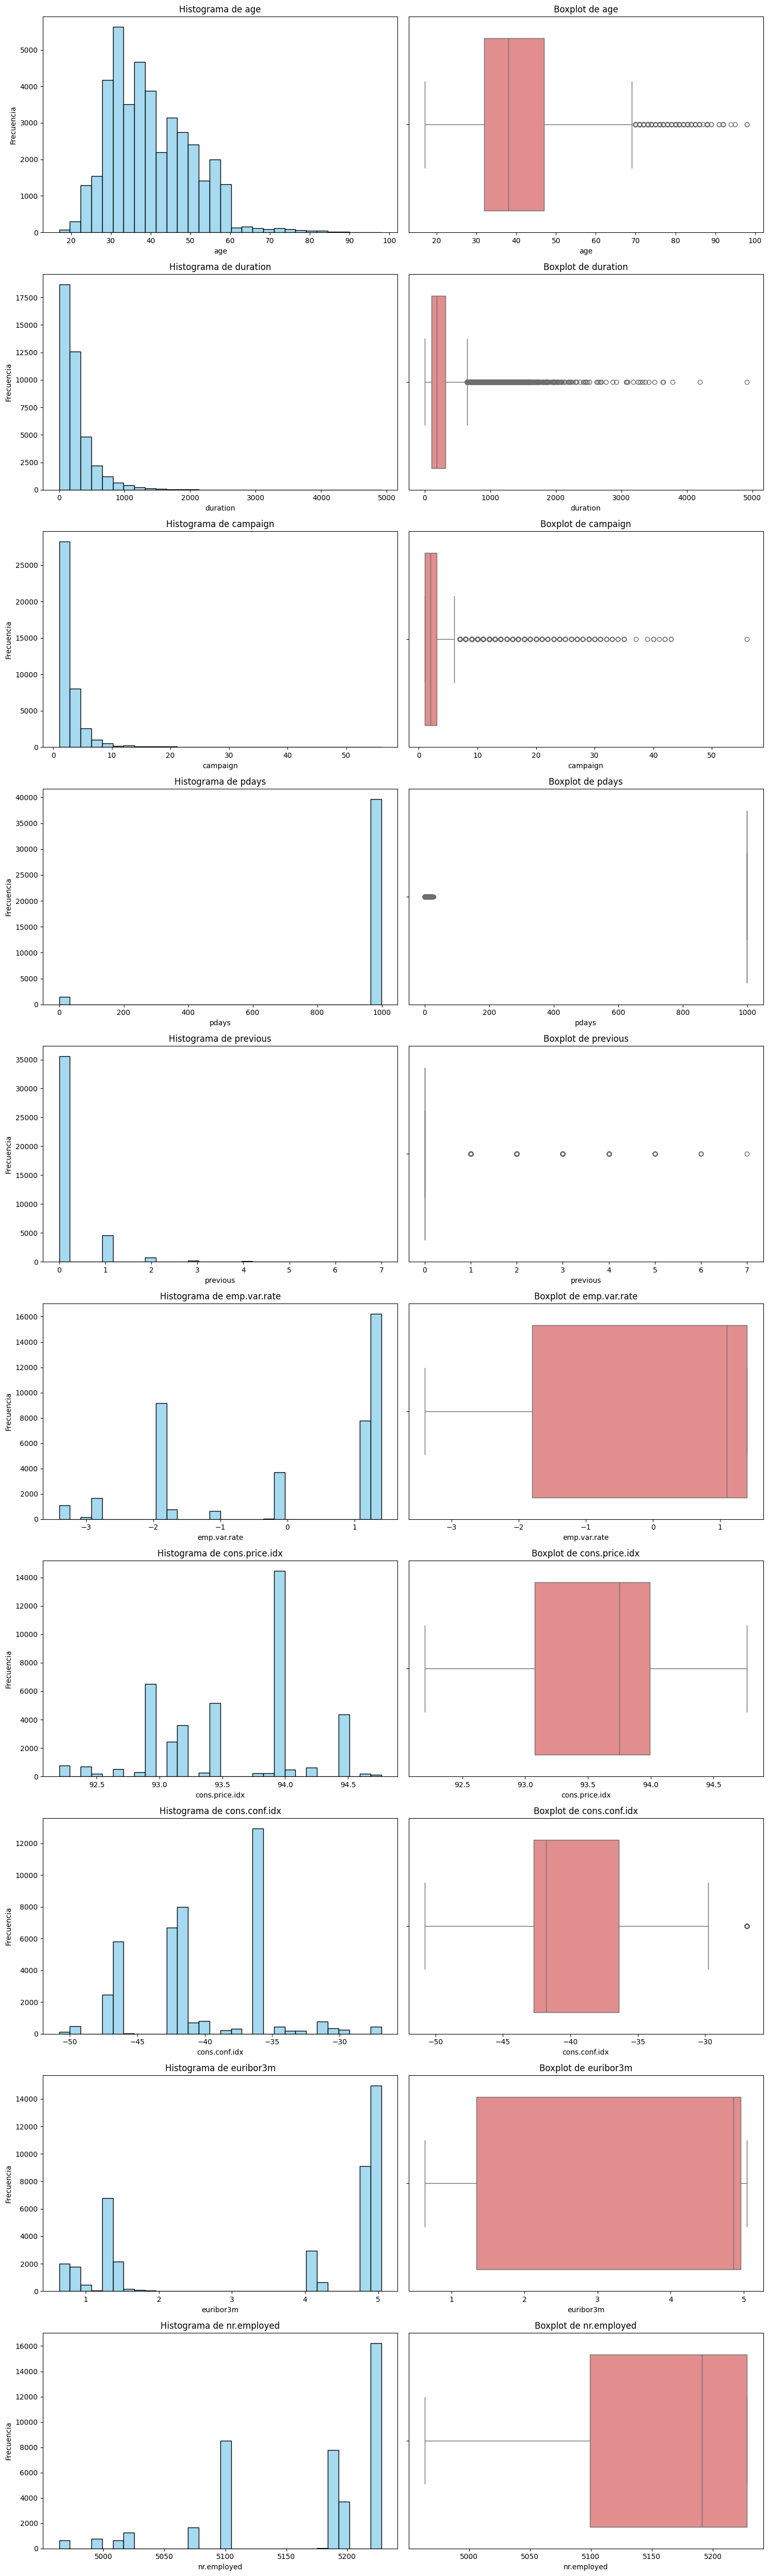

In [16]:
# Configuración del tamaño de la figura
plt.figure(figsize=(15, len(data_numerical.columns) * 5))

# Iterar sobre cada columna numérica para crear histogramas y boxplots
for i, col in enumerate(data_numerical.columns, 1):
    # Histograma
    plt.subplot(len(data_numerical.columns), 2, 2 * i - 1)
    sns.histplot(data_numerical[col], kde=False, bins=30, color='skyblue')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    
    # Boxplot
    plt.subplot(len(data_numerical.columns), 2, 2 * i)
    sns.boxplot(x=data_numerical[col], color='lightcoral')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)

# Ajuste de los espacios entre gráficos
plt.tight_layout()
plt.show()

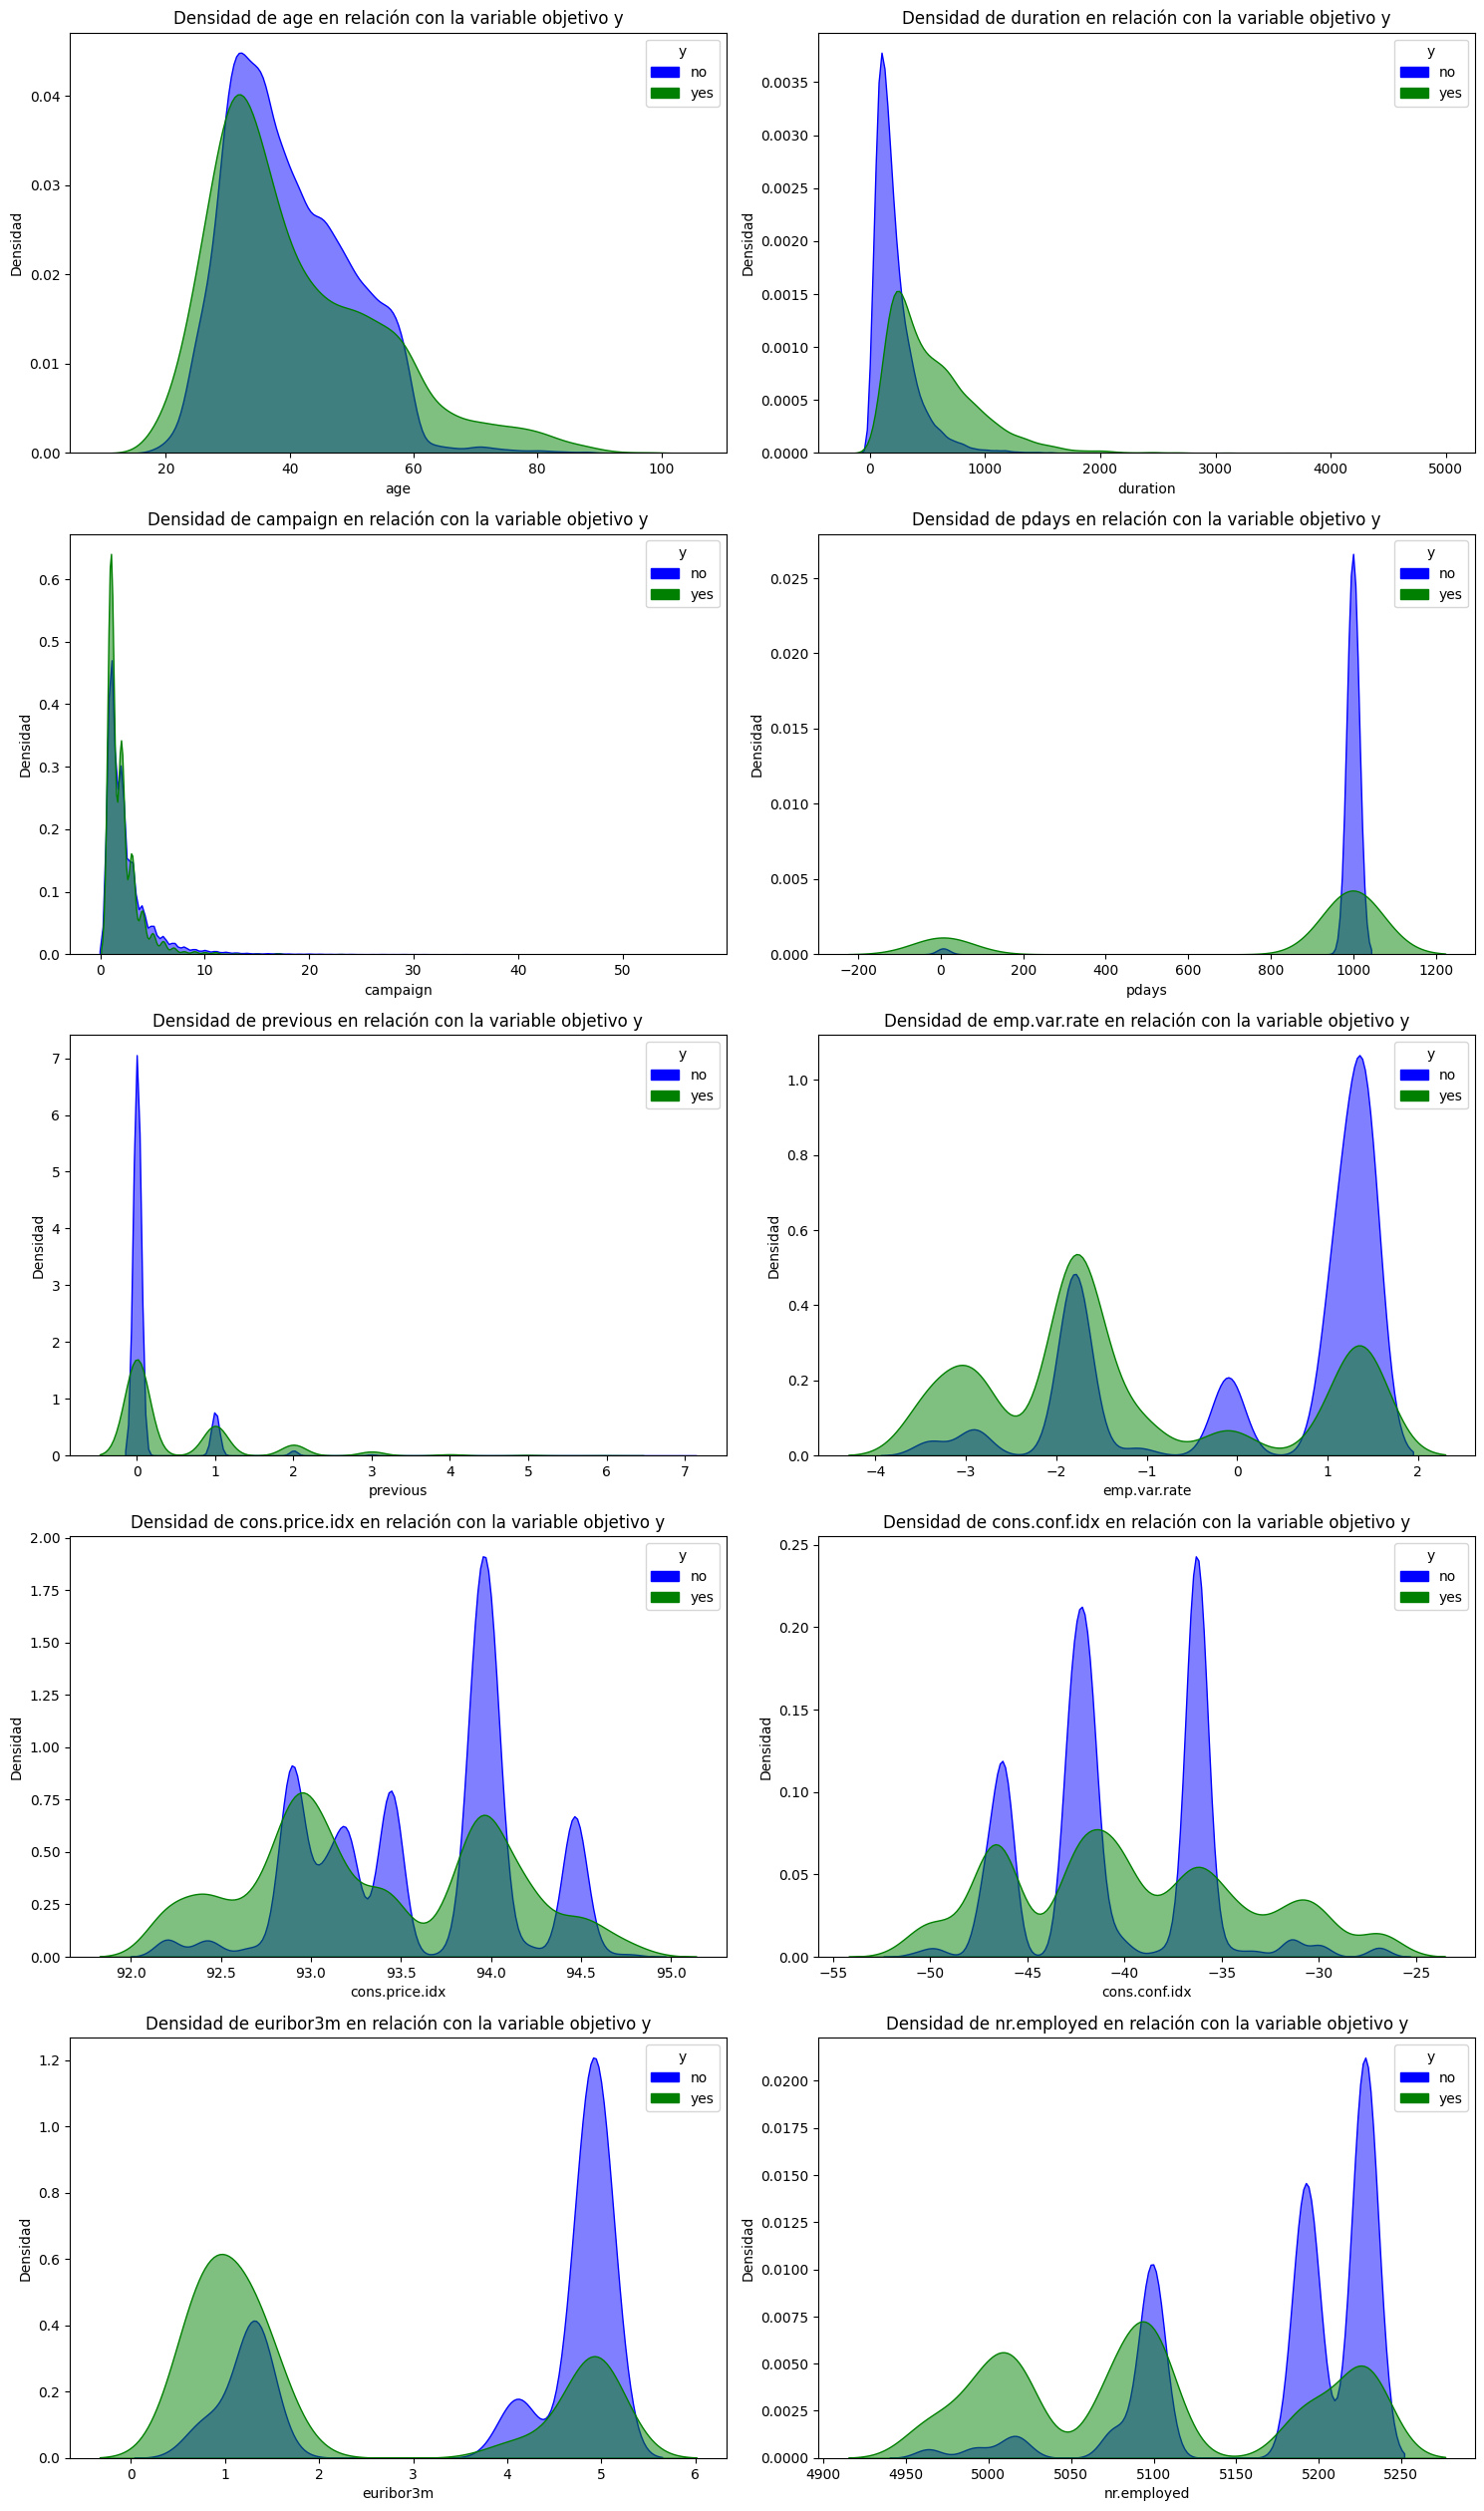

In [17]:
data_numerical_target = data.loc[:, numerical_columns + ['y']]

# Configuración del tamaño de la figura
plt.figure(figsize=(15, len(numerical_columns) * 5))

# Definir el mapa de colores
color_map = {'no': 'blue', 'yes': 'green'}

# Iterar sobre cada variable numérica y crear un gráfico de densidad
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, i)
    
    # Crear un gráfico de densidad para cada clase de 'y'
    for target in data_numerical_target['y'].unique():
        sns.kdeplot(
            data=data_numerical_target[data_numerical_target['y'] == target],
            x=col,
            color=color_map[target],
            fill=True,
            alpha=0.5,
            label=target
        )
    
    # Configurar la leyenda con los colores correctos
    handles = [plt.Rectangle((0,0),1,1, color=color) for color in color_map.values()]
    labels = list(color_map.keys())
    plt.legend(handles, labels, title='y')
    
    plt.title(f'Densidad de {col} en relación con la variable objetivo y')
    plt.xlabel(col)
    plt.ylabel('Densidad')

# Ajustar el espaciado entre gráficos
plt.tight_layout()
plt.show()


<Figure size 1000x1000 with 0 Axes>

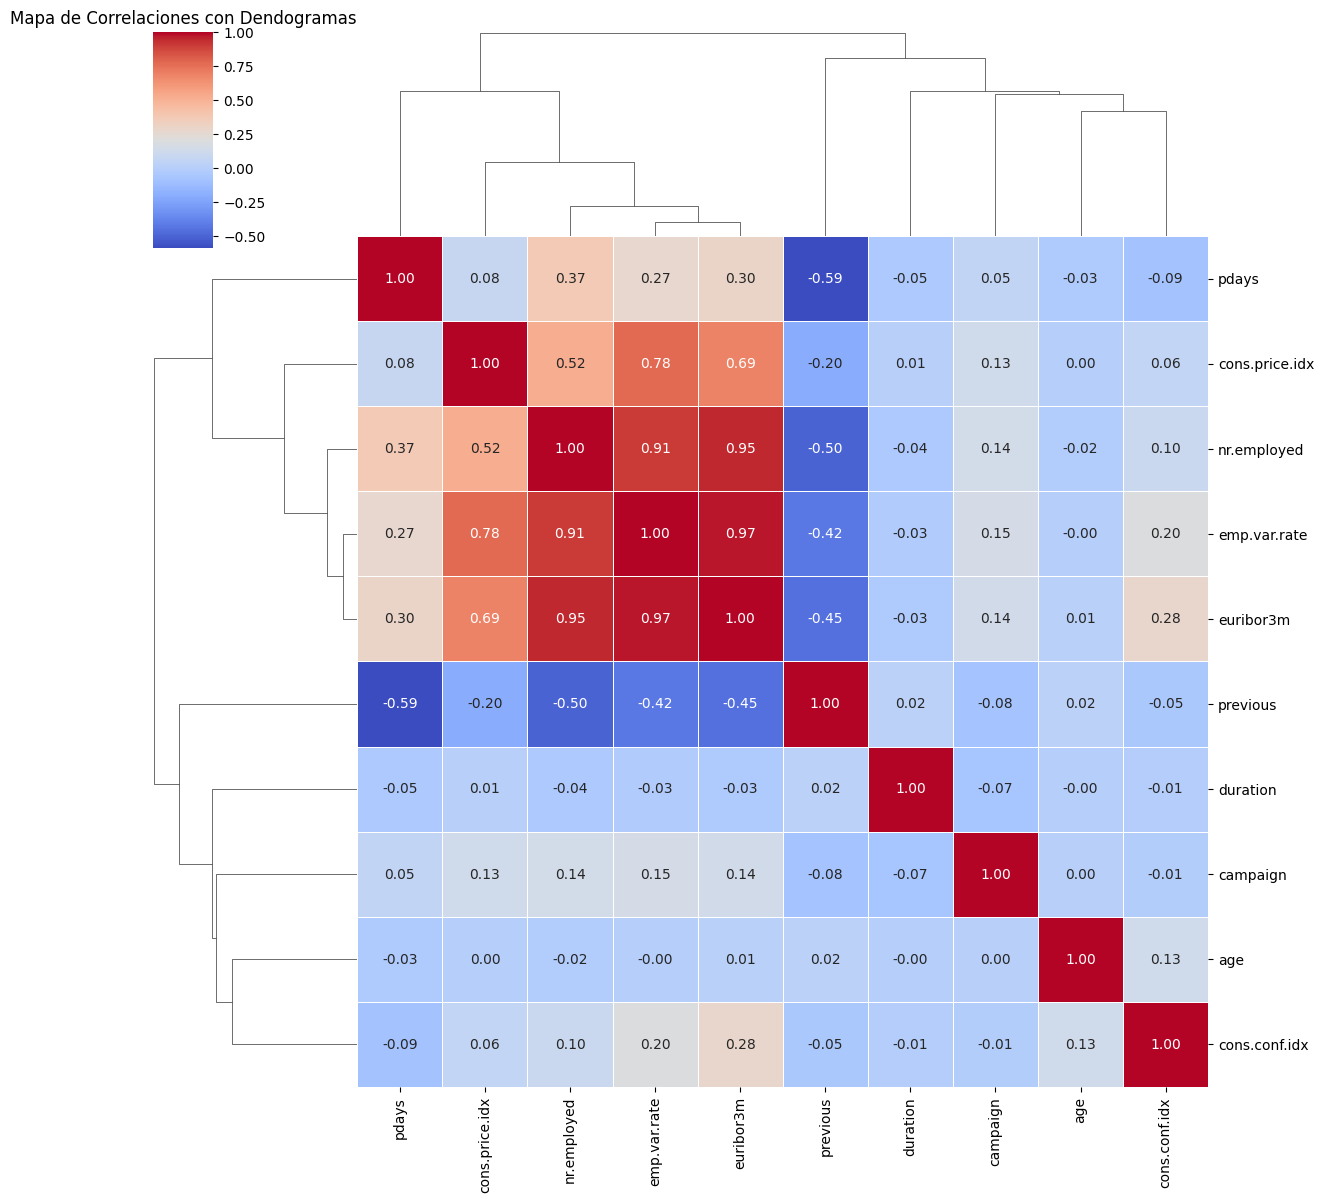

In [18]:
# Calcular la matriz de correlación
correlation_matrix = data_numerical.corr()

# Configuración del tamaño de la figura
plt.figure(figsize=(10, 10))

# Crear un mapa de calor con dendogramas
sns.clustermap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5, figsize=(12, 12),
               method='average', metric='euclidean')

# Mostrar el gráfico
plt.title("Mapa de Correlaciones con Dendogramas")
plt.show()

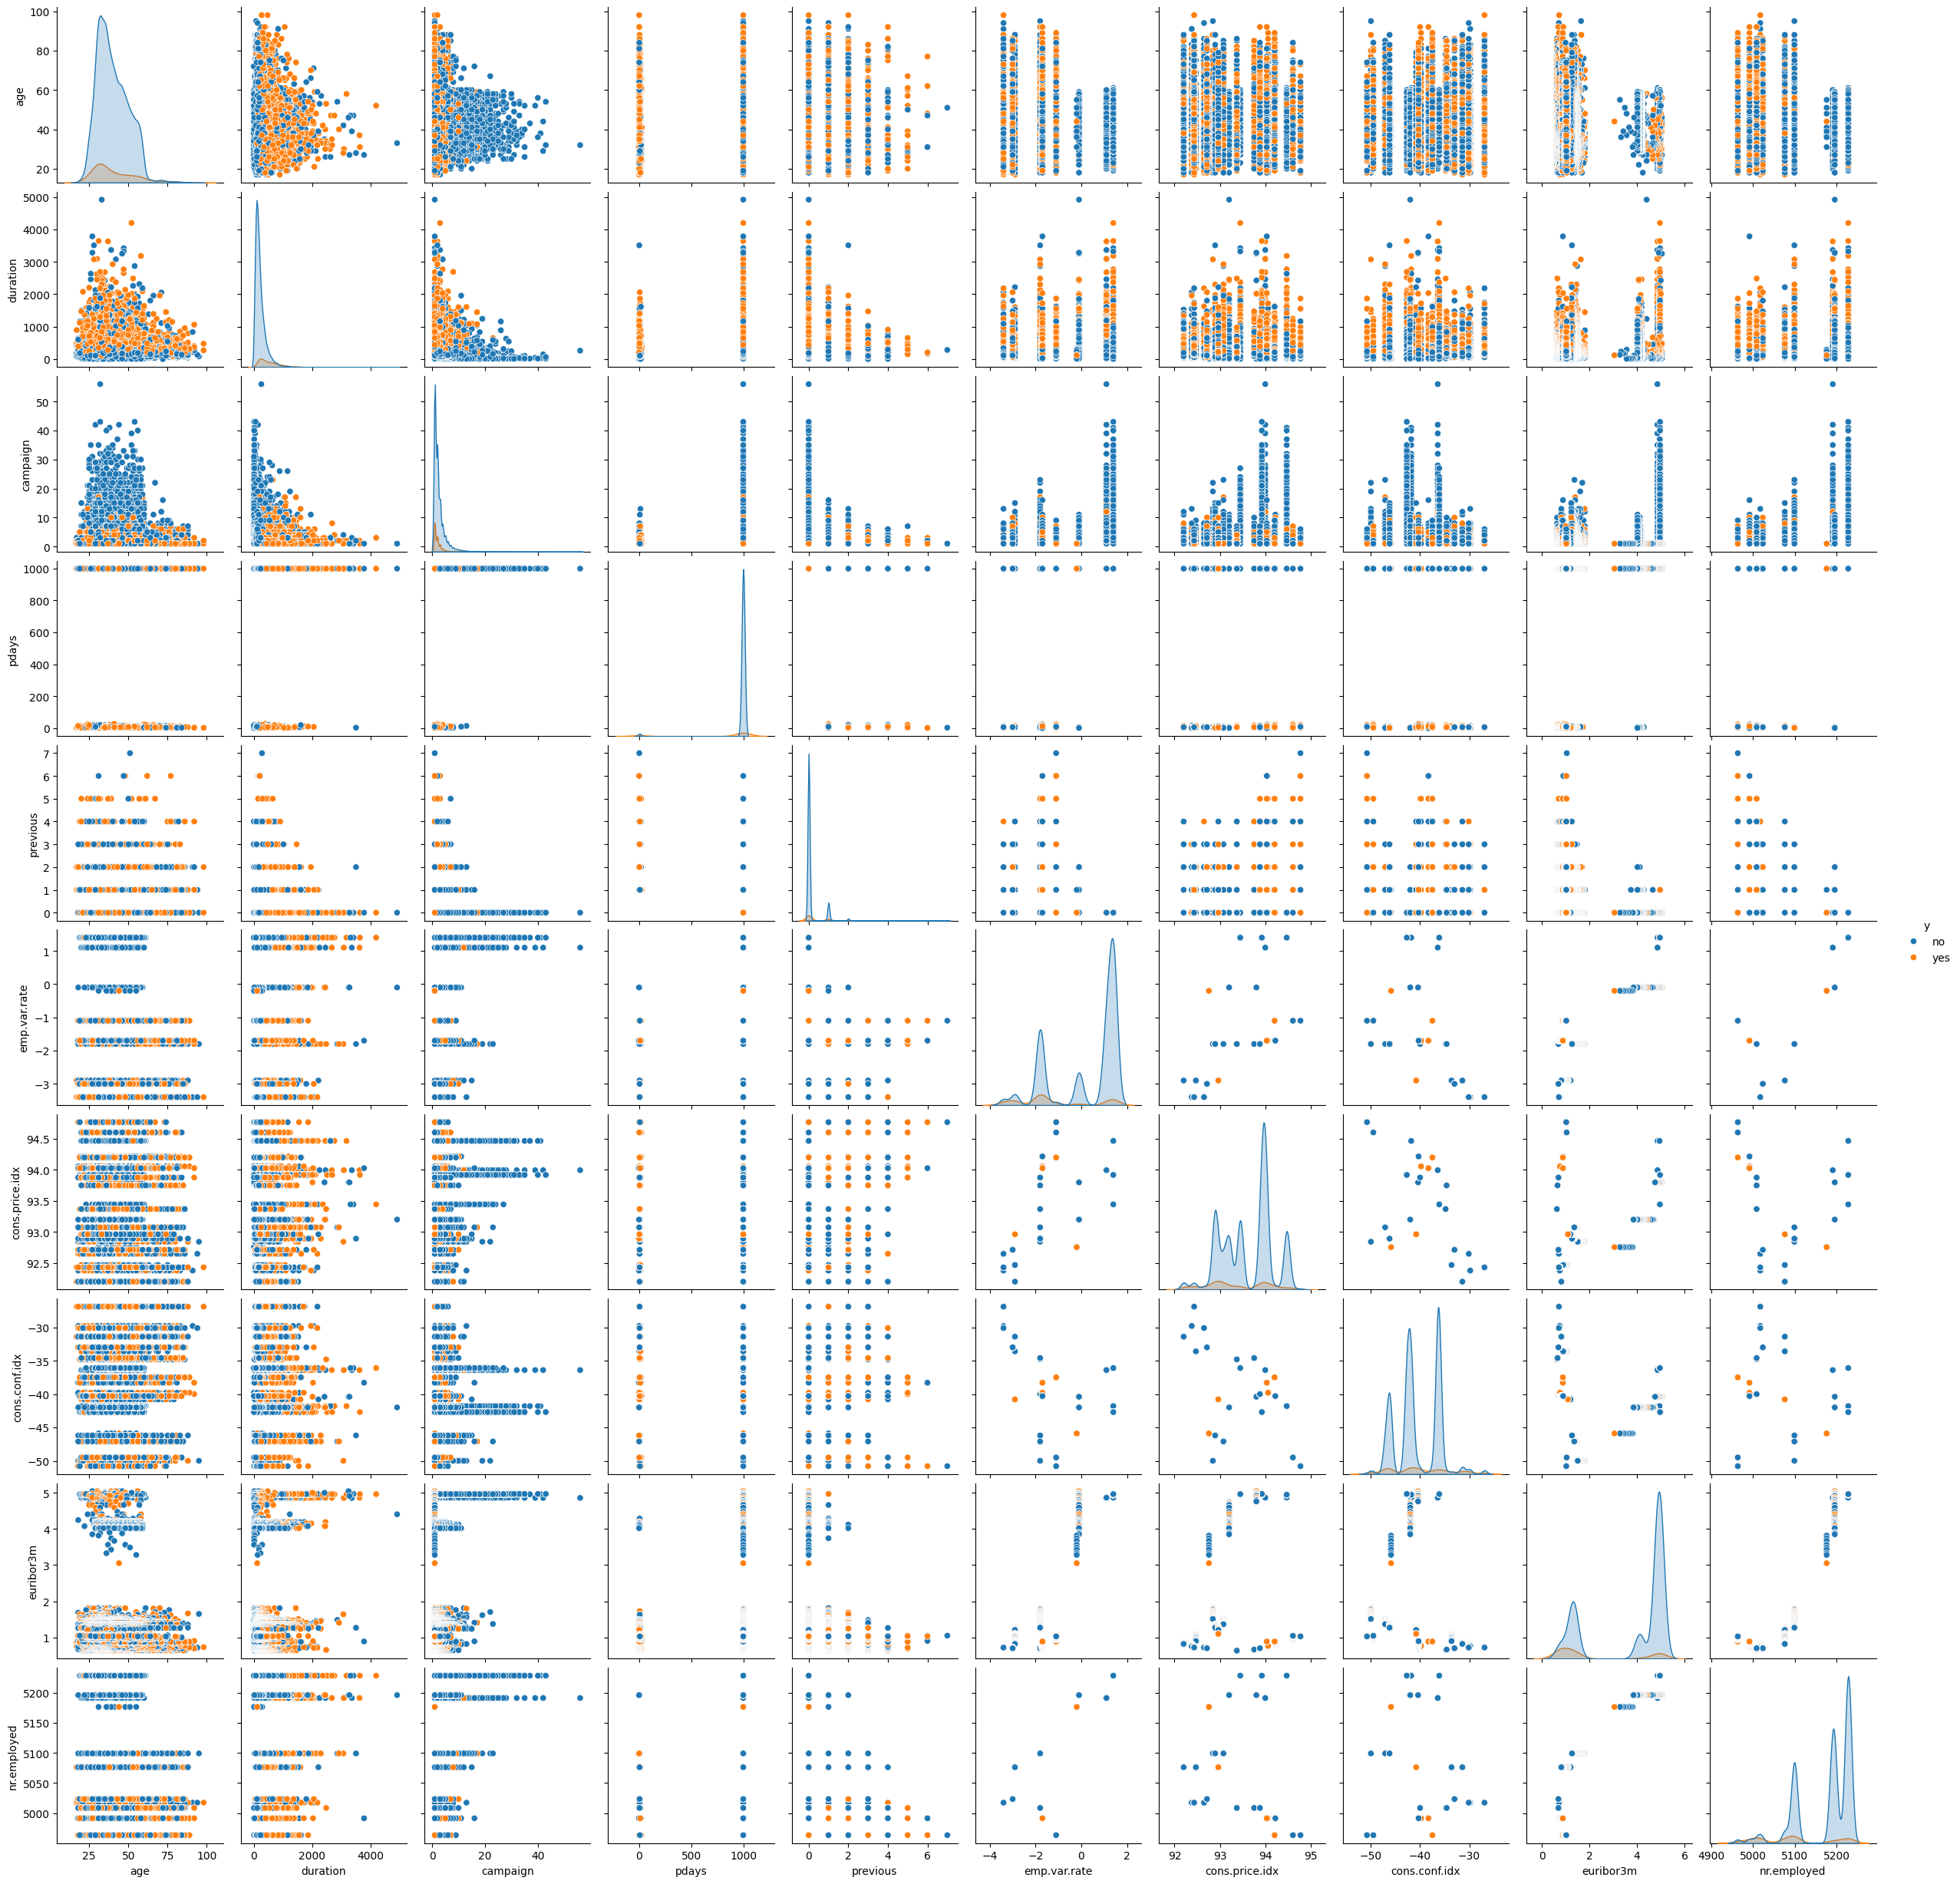

In [40]:
# sns.pairplot(data_numerical_target, hue="y")

In [20]:
scaler = StandardScaler()
data_set_scaled = scaler.fit_transform(data_numerical)

pca = PCA(n_components=2)

data_set_pca = pca.fit_transform(data_set_scaled)

In [39]:
def biplot(score, coeff, labels=None, labelsize=10):
    """
    Crea un gráfico biplot para visualizar los resultados del Análisis de Componentes Principales (PCA).
    Parámetros:
    - score (numpy.ndarray): Matriz de puntuación de PCA que contiene las coordenadas de los puntos de datos 
      en las dos primeras componentes principales.
    - coeff (numpy.ndarray): Matriz de coeficientes de PCA que contiene las direcciones 
      y magnitudes de las cargas de las variables originales en las dos primeras componentes principales.
    - labels (list, opcional): Etiquetas para las variables originales. Si se proporciona, 
      se mostrarán junto a las flechas que representan las variables en el gráfico.
    - labelsize (int, opcional): Tamaño de fuente de las etiquetas.
    Salida:
    - Gráfico biplot que muestra los puntos de datos proyectados en las dos primeras componentes principales 
      y las flechas que representan las variables originales.
    """
    # Crear la figura y los ejes
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Escalar los datos
    xs = score[:,0]
    ys = score[:,1]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    # Graficar los puntos de datos
    ax.scatter(xs * scalex, ys * scaley, alpha=0.5)
    
    # Graficar las flechas y etiquetas
    texts = []
    for i in range(len(coeff)):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is not None:
            text = ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='green', ha='center', va='center', size=labelsize, alpha=0.9)
            texts.append(text)
    
    # Configurar etiquetas y rejilla
    ax.set_xlabel("PC{}".format(1), fontsize=labelsize)
    ax.set_ylabel("PC{}".format(2), fontsize=labelsize)
    ax.grid(True)
    
    # Ajustar las posiciones de las etiquetas para evitar superposiciones
    adjust_text(texts, expand_points=(0, 0.5))
    
    # Ajustar el diseño y mostrar el gráfico
    plt.tight_layout()
    plt.show()

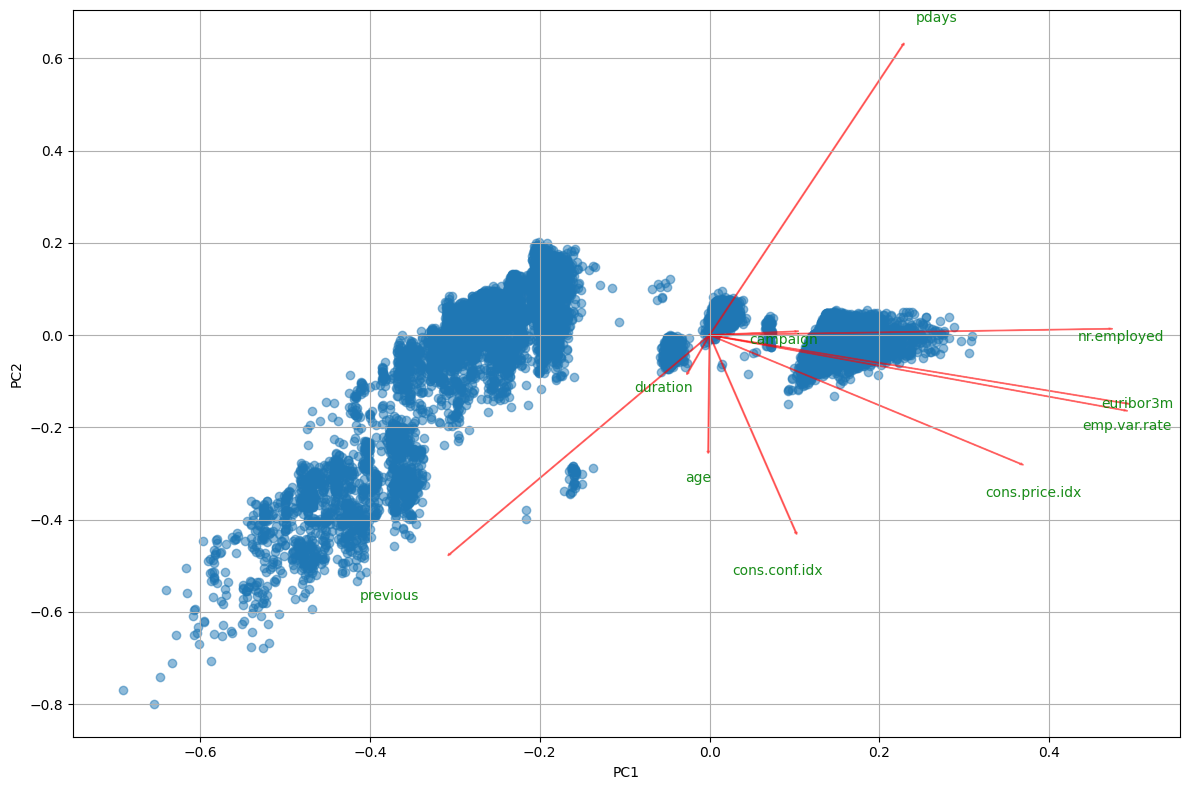

In [40]:
biplot(data_set_pca[:, 0:2], np.transpose(pca.components_[0:2, :]), labels=numerical_columns)

# 6. Conclusiones